# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [76]:
import requests
    
url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [77]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [78]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

To obtain the needed information, we should locate the correct key by using the .find() method. We can examine the HTML structure by employing .prettify().

In [79]:
table = soup.find('table', class_='history-rates-data')
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2024-08-30">
     <span class="nowrap">
      2024-8-30
     </span>
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2024-08-30">
     <span class="nowrap">
      2024-8-30
  


Next, we need to find the row length.

In [80]:
#Tanggal
rows = table.find_all('tr')
row_length = len(rows)
row_length

134

we are going to carry out web scraping procedure in this section. This entails extracting data from a webpage by accurately identifying and accessing the necessary HTML elements and attributes.

You can implement a for loop to execute the scraping task, tailoring it to the HTML structure of the website and the specific information you wish to collect. This approach allows you to iterate through various elements or data points to gather the desired information efficiently.

In [81]:
temp = []  # Initiating a list to store the tuples

# Loop through each row
for i in range(1, row_length):
    # Get the row
    row = table.find_all('tr')[i]
    
    # Get Date
    date_element = row.find('span', class_='nowrap')
    if date_element:
        date = date_element.text
    else:
        date = None  # Handle the case where the date is not found
    
    # Get Daily Price
    price_element = row.find('span', class_='w')
    if price_element:
        daily_price = price_element.text
    else:
        daily_price = None  # Handle the case where the price is not found
    
    # Append the tuple to the list
    temp.append((date, daily_price))

temp

[('2024-8-30', '1 USD = 15,532 IDR'),
 ('2024-8-29', '1 USD = 15,466 IDR'),
 ('2024-8-28', '1 USD = 15,446 IDR'),
 ('2024-8-27', '1 USD = 15,481 IDR'),
 ('2024-8-26', '1 USD = 15,483 IDR'),
 ('2024-8-23', '1 USD = 15,401 IDR'),
 ('2024-8-22', '1 USD = 15,751 IDR'),
 ('2024-8-21', '1 USD = 15,508 IDR'),
 ('2024-8-20', '1 USD = 15,449 IDR'),
 ('2024-8-19', '1 USD = 15,530 IDR'),
 (None, None),
 ('2024-8-16', '1 USD = 15,698 IDR'),
 ('2024-8-15', '1 USD = 15,773 IDR'),
 ('2024-8-14', '1 USD = 15,634 IDR'),
 ('2024-8-13', '1 USD = 15,756 IDR'),
 ('2024-8-12', '1 USD = 15,948 IDR'),
 ('2024-8-9', '1 USD = 15,950 IDR'),
 ('2024-8-8', '1 USD = 15,985 IDR'),
 ('2024-8-7', '1 USD = 16,030 IDR'),
 ('2024-8-6', '1 USD = 16,175 IDR'),
 ('2024-8-5', '1 USD = 16,222 IDR'),
 ('2024-8-2', '1 USD = 16,176 IDR'),
 ('2024-8-1', '1 USD = 16,275 IDR'),
 ('2024-7-31', '1 USD = 16,251 IDR'),
 ('2024-7-30', '1 USD = 16,326 IDR'),
 ('2024-7-29', '1 USD = 16,297 IDR'),
 ('2024-7-26', '1 USD = 16,304 IDR'),
 ('2

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [82]:
import pandas as pd

df = pd.DataFrame(temp, columns= ('date', 'daily_price'))
df.head()

,date,daily_price
0,2024-8-30,"1 USD = 15,532 IDR"
1,2024-8-29,"1 USD = 15,466 IDR"
2,2024-8-28,"1 USD = 15,446 IDR"
3,2024-8-27,"1 USD = 15,481 IDR"
4,2024-8-26,"1 USD = 15,483 IDR"


### Data Cleansing

First we are going to check our data types

In [83]:

df.dtypes

date           object
daily_price    object
dtype: object

Next we are going to change the data types of our columns into their corresponding data types.

In [84]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Clean and convert the 'daily_price' column to numeric format
df['daily_price'] = df['daily_price'].str.replace('1 USD = ', '').str.replace(',', '').str.replace(' IDR', '')
df['daily_price'] = pd.to_numeric(df['daily_price'], errors='coerce')

# Display the updated DataFrame
df.head()

,date,daily_price
0,2024-08-30,15532.0
1,2024-08-29,15466.0
2,2024-08-28,15446.0
3,2024-08-27,15481.0
4,2024-08-26,15483.0


### Data Visualization

to create a good looking plot, we need to first aggregate the data

In [93]:
viz = df.pivot_table(
    index='date',         
    values='daily_price',  
    aggfunc='sum'  
)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

<Axes: xlabel='date'>

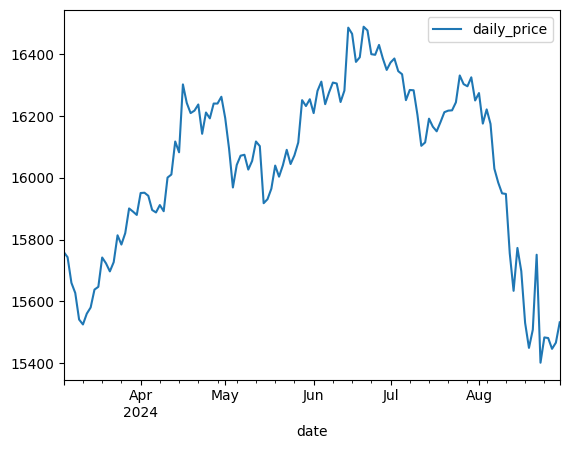

In [95]:
viz.plot.line()

## Analysis

-Based on the graphic, the price of 1 USD is steadily increasing from 2024-03 until 2024-08 where the price suddenly drastically dropped from around 1 USD = 16200 IDR to 1 USD = 15500 by the end of August 2024 

## Conclusion:
The analysis suggests a period of steady depreciation of the Indonesian Rupiah against the US Dollar, followed by a sudden and significant appreciation. This could indicate underlying economic or political shifts that warrant further investigation to understand the causes and broader implications.


### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.